<a href="https://colab.research.google.com/github/jyotiraj-code/qubitxqubit/blob/main/QXQ_YLC_Week_12_Homework_%5BJyotiraj%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 12: Review**
---

### **Description**:
In this assignment, you will review concepts from the first semester that will be useful for us to implement more complex quantum circuits going forward.

<br>

### **Structure**
**Part 1**: [Qubits](#p1)

**Part 2**: [Quantum Circuits](#p2)



<br>

### **Resources**
* [Cirq Basics Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M/edit?usp=drive_link)


<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [2]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 782.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:00
    

<a name="p1"></a>

---
## **Part 1: Qubits**
---
In this part, you will review how to create and work with quantum circuits in Cirq.

#### **Problem #1.1**
Output the vector below in ket notation.

In [3]:
vec = [1/np.sqrt(2), 1/np.sqrt(2)]

In [4]:
# COMPLETE THIS CODE
vec

[0.7071067811865475, 0.7071067811865475]

#### **Problem #1.2**
Output the final state vector of the circuit, `circuit`, below in ket notation.

In [6]:
# @title
num_qubits = 4
qubits = cirq.NamedQubit.range(num_qubits, prefix = 'q')
circuit = cirq.Circuit()
circuit.append(cirq.H(qubits[0]))

for i in range(num_qubits - 1):
  circuit.append(cirq.CNOT(qubits[i], qubits[i+1]))

print(circuit)

q0: ───H───@───────────
           │
q1: ───────X───@───────
               │
q2: ───────────X───@───
                   │
q3: ───────────────X───


In [7]:
# COMPLETE THIS CODE
sv = cirq.final_state_vector(circuit)
ket = cirq.dirac_notation(sv)
print(ket)

0.71|0000⟩ + 0.71|1111⟩


#### **Problem #1.3**
Output the final state vector of the circuit, `my_circuit`, below in ket notation.

In [8]:
# @title
my_qubits = cirq.NamedQubit.range(4, prefix="q")
my_circuit = cirq.Circuit()
my_gates = [cirq.X, cirq.H, cirq.X, cirq.H]

for i in range(4):
  gate = my_gates[i]
  my_circuit.append(gate(my_qubits[i]))

my_circuit

q0: ───X───

q1: ───H───

q2: ───X───

q3: ───H───

In [9]:
# COMPLETE THIS CODE
sv = cirq.final_state_vector(my_circuit)
ket = cirq.dirac_notation(sv)
print(ket)

0.5|1010⟩ + 0.5|1011⟩ + 0.5|1110⟩ + 0.5|1111⟩


<a name="p2"></a>

---
## **Part 2: Quantum Circuits**
---
In this part, you will review how to create and work with quantum circuits in Cirq.

#### **Problem #2.1**
Create a three qubits and an empty circuit. Put the first qubit in a superposition. Modify the circuit such that the first qubit and the second qubit are always in the same state and the first qubit and the third qubit are alwas in opposite states. Output the final state vector of your circuit in ket notation.

In [10]:
my_qubits = cirq.NamedQubit.range(3, prefix = "q")# COMPLETE THIS CODE
my_circuit = cirq.Circuit()# COMPLETE THIS CODE
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[1]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[2]))
print(my_circuit)

q0: ───H───@───@───
           │   │
q1: ───────X───┼───
               │
q2: ───────────X───


#### **Problem #2.2**
Append a measurement to each qubit on your circuit from Problem #2.1. Simulate the results of your circuit 100 times. Output the results on a histogram.

In [11]:
# COMPLETE THIS CODE
my_circuit.append(cirq.measure(my_qubits))

In [12]:
# COMPLETE THIS CODE
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions=100)

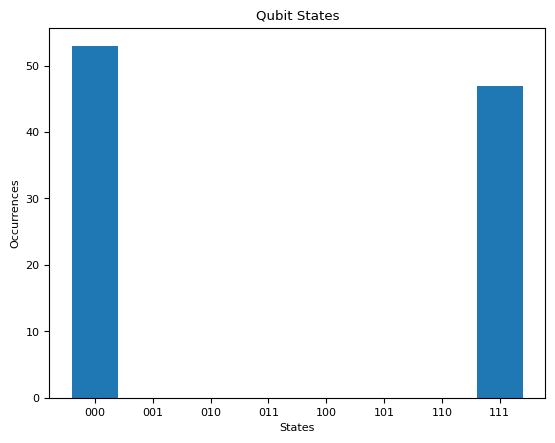

In [13]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))# COMPLETE THIS CODE

plt.show()

####**Problem #2.3**
Create 4 qubits and an empty circuit. Apply an H gate and a Z gate to each qubit. Append a measurement to each and simulate the circuit 100 times. Output the results on a histogram.

In [14]:
my_qubits = cirq.NamedQubit.range(4, prefix = "q")# COMPLETE THIS CODE
my_circuit = cirq.Circuit()# COMPLETE THIS CODE
my_circuit.append(cirq.H.on_each(my_qubits))
my_circuit.append(cirq.Z.on_each(my_qubits))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

q0: ───H───Z───M───
               │
q1: ───H───Z───M───
               │
q2: ───H───Z───M───
               │
q3: ───H───Z───M───

In [15]:
# COMPLETE THIS CODE
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions=100)

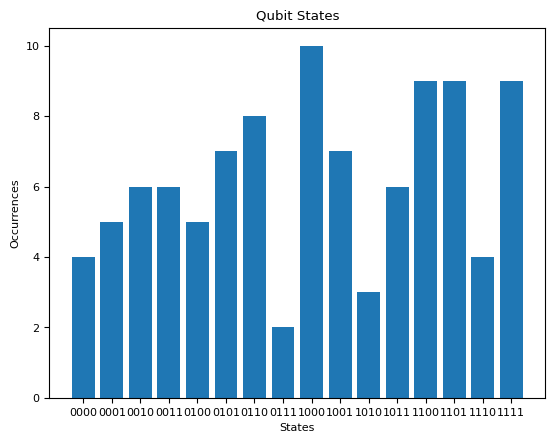

In [16]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(4))# COMPLETE THIS CODE

plt.show()

####**Problem #2.4**
Modify the circuit below such that the final state vector is: $$0.5|000 \rangle + 0.5|010 \rangle + 0.5|101 \rangle + 0.5|111 \rangle$$

In [17]:
my_qubits = cirq.NamedQubit.range(3, prefix="q")
my_circuit = cirq.Circuit()

my_circuit.append(cirq.H.on_each(my_qubits))
my_circuit.append(cirq.H(my_qubits[2]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[2]))

my_circuit

q0: ───H───────@───
               │
q1: ───H───────┼───
               │
q2: ───H───H───X───

In [18]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))# COMPLETE THIS CODE

'0.5|000⟩ + 0.5|010⟩ + 0.5|101⟩ + 0.5|111⟩'

# End of Lab

---

© 2024 The Coding School, All rights reserved